#Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

Based on practice sample #1, proceed:
1. Read data
2. Visualize some information of data
3. Normalize Data to train linear regression model
4. Train linear regression model and show the model's intercepts, coeficients
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?


**Submission Link**: https://forms.gle/uKAq34QrbwTcbs5Z9 (Submit your .ipynb file)

In [70]:
# mount data from google drive to colab
#from google.colab import drive
#drive.mount('/content/drive')

#import library
import pandas as pd # pandas
import numpy as np # numpy
import time # time

# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [71]:
# read data using Pandas DataFrame
def read_dataset(path):
    # Todo: read_csv from a path and return a DataFrame
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income (USD)'}>],
       [<Axes: title={'center': 'Property Age'}>,
        <Axes: title={'center': 'Property Price'}>],
       [<Axes: title={'center': 'Loan Sanction Amount (USD)'}>, <Axes: >]],
      dtype=object)

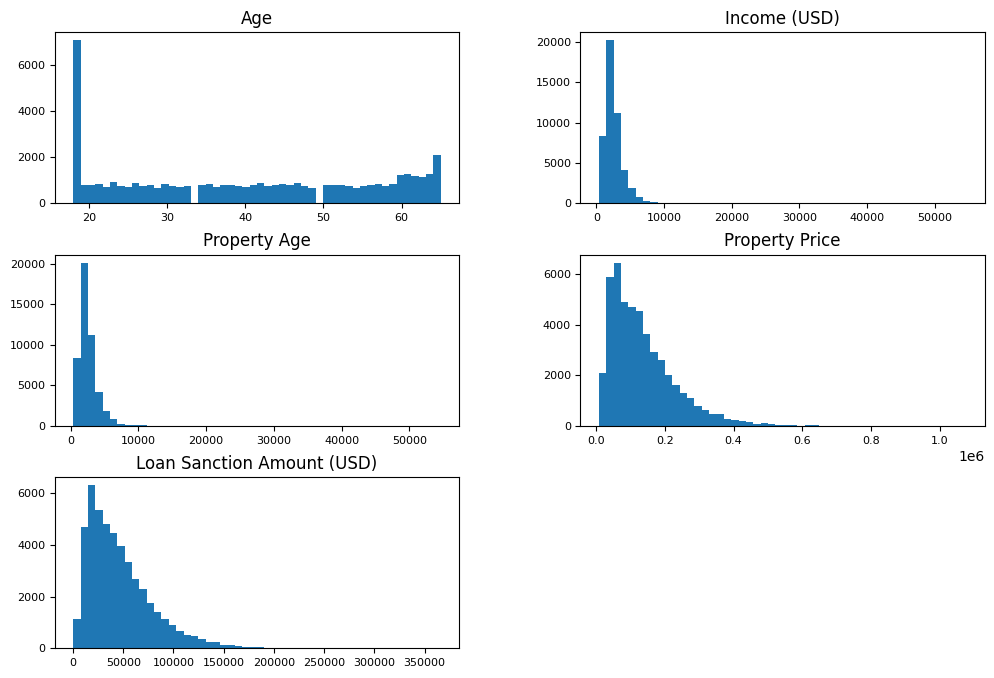

In [72]:
path = "final_house_loan.csv" # Path to your file

df = read_dataset(path)
#ToDo: Show histogram of dataframe
df.hist(figsize=(12, 8), bins=50, xlabelsize=8, ylabelsize=8, grid=False)

## Data Analysis

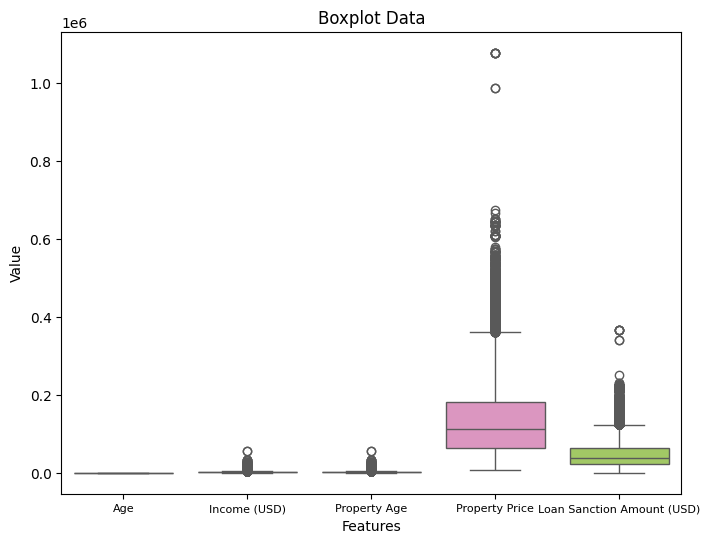

In [73]:
# Data analysis
# Todo: analyze your data here
# Boxplot outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=df.select_dtypes(include='number'), palette="Set2")  # Replace with the numerical column you want to analyze
plt.title('Boxplot Data')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(fontsize=8)
plt.grid(False)
plt.show()

In [74]:
# Remove outliers using IQR method
def remove_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [75]:
for col in df.select_dtypes(include='number').columns:
    df = remove_outliers_iqr(df, col)

## Preprocessing

In [32]:
df.shape

(47297, 8)

In [33]:
df.dtypes

Gender                         object
Age                             int64
Income (USD)                  float64
Income Stability               object
Property Age                  float64
Property Location              object
Property Price                float64
Loan Sanction Amount (USD)    float64
dtype: object

In [34]:
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [53]:
df.duplicated().sum()

np.int64(0)

In [35]:
def preprocessing_data(df):
    # --- (Optional) Drop null datapoints or fill missing data
    # Keep your data the same if you dont want to customize it

    # Điền giá trị 'Income Stability' là 'Low' nếu giá trị 'Income (USD)' nhỏ hơn 2586 và 'High' nếu lớn hơn 2586 
    # do 2586 là giá trị trung bình của 'Income (USD)'
    df.loc[(df['Income Stability'].isnull()) & (df['Income (USD)'] < 2586), 'Income Stability'] = 'Low'
    df.loc[(df['Income Stability'].isnull()) & (df['Income (USD)'] >= 2586), 'Income Stability'] = 'High'

    import random
    
    # Điền giá trị 'Income (USD)' trong khoảng (0, 2586) nếu 'Income Stability' là 'Low' 
    # và trong (2586, 54663) nếu 'Income Stability' là 'High' do 2586 là giá trị trung bình của 'Income (USD)'
    df.loc[(df['Income (USD)'].isnull()) & (df['Income Stability'] == 'Low'), 'Income (USD)'] = random.randint(0, 2586)
    df.loc[(df['Income (USD)'].isnull()) & (df['Income Stability'] == 'High'), 'Income (USD)'] = random.randint(2586, 54663)
    # Điền giá trị null của 'Property Age' bằng 'Income (USD)' do 2 cột này có giá trị tương quan với nhau
    df.loc[(df['Property Age'].isnull()), 'Property Age'] = df['Income (USD)']

    df = df.drop_duplicates() # Drop duplicates
    df = df.dropna() # Drop null values 
    return df

In [36]:
df = preprocessing_data(df.copy())

## Feature Engineering

In [ ]:
def normalize_data(df):
    # Todo: normalize data into numerical data
    start_time = time.time()
    normalized_data = df.copy()
    # Chuyển cột 'Gender' thành 0 và 1 và cột 'Income Stability' thành 0 và 1
    normalized_data['Gender'] = normalized_data['Gender'].apply(lambda x: 0 if x=="M" else 1)
    normalized_data['Income Stability'] = normalized_data['Income Stability'].apply(lambda x: 0 if x=="High" else 1)
    # Chuyển Property Location label encoder
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    normalized_data['Property Location'] = le.fit_transform(normalized_data['Property Location'])
    print("Running time", time.time() - start_time)
    return normalized_data

<Axes: >

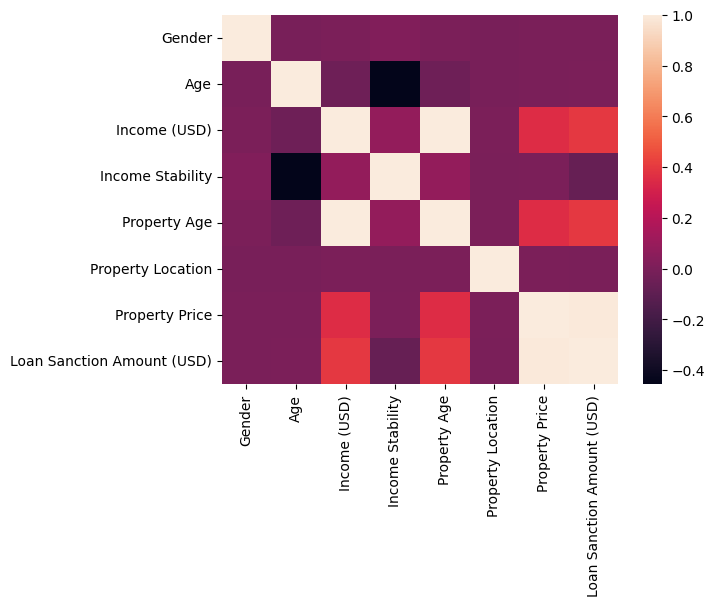

In [38]:
# Heatmap
import seaborn as sns

df = normalize_data(df.copy())
sns.heatmap(df.corr()) # Show heatmap after normalized data

# Apply machine learning model

## Train-test split

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [40]:
def prepare_X_y(df):
    # Split data into X and y. Return two dataframes

    columns = df.columns.tolist()
    columns.remove('Loan Sanction Amount (USD)')  # Remove the target column from the feature list
    X = df[columns]  # Todo: Select features
    y = df['Loan Sanction Amount (USD)']  # Todo: Select label
    return X, y

X, y = prepare_X_y(df)

In [41]:
def split_train_test(X, y, train_size=0.7):
    trainX, testX ,trainY, testY = train_test_split(X, y, train_size=0.7)# Use sklearn train_test_split to split X and y into 2 sets: train set and test set. With train_size is the proportion of train_set and fix the random_state with a number
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))

    return trainX, testX ,trainY, testY

In [42]:
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = split_train_test(X, y, train_size=TRAIN_SIZE)

Training:(33104, 7)
Test:(14188, 7)


## Basic Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression


def build_linear_model(X, y):
    model = LinearRegression(fit_intercept=True)        # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(X, y)
    return model

model = build_linear_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  164.90416367952344
mean absolute error of linear model on test set  175.6302363074425
[ 2.43641968e+02 -8.00578012e+01  4.43472466e-01 -1.11615408e+04
  5.75810194e-01 -6.26259416e+01  3.36247459e-01]

11734.11515612853


In [44]:
from sklearn.linear_model import Lasso


def build_lasso_model(X, y):
    model = Lasso()     # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(X, y)
    return model

model = build_lasso_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  165.29897621080116
mean absolute error of linear model on test set  175.9650113412653
[ 2.39581458e+02 -7.99244847e+01  8.27105035e-01 -1.11454376e+04
  1.91988451e-01 -6.10757008e+01  3.36248263e-01]

11714.98371003032


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.220e+10, tolerance: 3.544e+09
  model = cd_fast.enet_coordinate_descent(


In [45]:
from sklearn.linear_model import Ridge


def build_ridge_model(X, y):
    model = Ridge()     # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(X, y) # fit the model with X and y
    return model

model = build_ridge_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  164.9721205561889
mean absolute error of linear model on test set  175.70373443742258
[ 2.43564866e+02 -8.00152865e+01  4.45463639e-01 -1.11562778e+04
  5.73744953e-01 -6.26015304e+01  3.36247855e-01]

11727.774158083303


In [46]:
from sklearn.linear_model import ElasticNet


def build_elastic_model(X, y):
    model = ElasticNet()    # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(X, y) # fit the model with X and y
    return model

model = build_elastic_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  1766.004216352404
mean absolute error of linear model on test set  1768.1667737822474
[ 5.05273756e+01 -1.47929087e-01  9.52960516e-01 -1.26624767e+03
 -7.30880104e-02 -1.22140652e+01  3.36992062e-01]

-166.65156784626743


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.511e+11, tolerance: 3.544e+09
  model = cd_fast.enet_coordinate_descent(


## Polynomial Transform

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [47]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())   # use make_pipeline to apply PolynomialFeatures and a Regression model train your dataset
    poly_model.fit(X, y)

    return poly_model

poly_model = build_pipeline(trainX, trainY)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  212.63615306321512
mean absolute error of linear model (with poly transform) on test set  223.73184560297562


In [48]:
# --- To get output of polynomial model
# We can call its name
linear_model = poly_model["linearregression"]
# or by number
linear_model = poly_model[1]

print(linear_model.coef_) # print coefficient
print(linear_model.intercept_) # print intercept

[-1.44618706e-01  1.05090154e+02 -3.80894560e-01 -4.46514774e+00
  1.38301923e+00  1.61182684e+01  3.38575993e-01 -1.44618678e-01
  3.97937899e+00  2.87056938e-01 -2.14884009e+00 -2.60410494e-01
  1.23216553e+01 -1.56744409e-04 -8.63077510e-02  1.38850906e-02
 -1.75606136e+02 -1.33778137e-02 -2.71635697e+00 -2.67655839e-05
 -8.43020343e-01 -3.43072584e-01  1.68625466e+00  6.69592670e-02
 -1.25615786e-06 -4.46514774e+00  3.55902951e-01  1.74125917e+01
 -6.04588645e-04 -8.43233822e-01 -8.76757469e-02  1.19020613e-06
  5.70185067e+01 -2.30204190e-04 -4.87773377e-10]
337.31267850034055


In [49]:
from sklearn.manifold import TSNE

# Split X, y from dataset
columns = df.columns.tolist()     # Columns name
draw_data = df[columns]        # X
draw_data = TSNE(n_components=1, learning_rate='auto', init='random', perplexity=3).fit_transform(draw_data)

In [50]:
from sklearn.model_selection import train_test_split
draw_train_X, draw_test_X ,trainY, testY = train_test_split(draw_data, y, train_size=0.70, random_state=2023)
print('Training:' + str(trainX.shape))
print('Test:' + str(testX.shape))

Training:(33104, 7)
Test:(14188, 7)


In [51]:
#model basic
model = LinearRegression(fit_intercept=True)
model.fit(draw_train_X, trainY)
pred = model.predict(draw_train_X)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )

#model polinomial
poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())
poly_model.fit(draw_train_X, trainY)
poly_pred = poly_model.predict(draw_train_X)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

mean absolute error of linear model on train set  24949.656031291805
mean absolute error of linear model (with poly transform) on train set  24939.338825797036


# Visualization

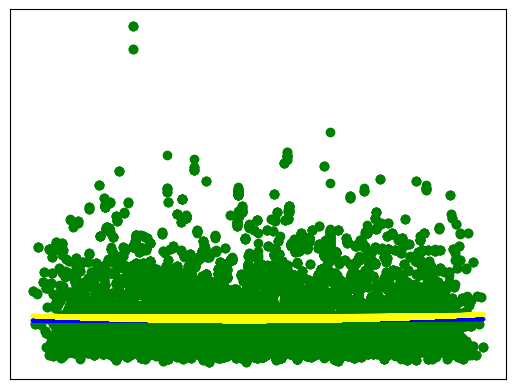

In [52]:
import matplotlib.pyplot as plt

plt.scatter(draw_train_X, trainY, color="g")
plt.plot(draw_train_X, pred, color="blue", linewidth=3)
plt.plot(draw_train_X, poly_pred, color="yellow", linewidth=3)


plt.xticks(())
plt.yticks(())

plt.show()